# Description

Authenticate with Reddit: Use praw to connect to Reddit with your credentials.

Get Data: Extract titles from the "technology" subreddit.

Clean Data: Write a function to remove unwanted characters like mentions, hashtags, links, and emojis.

Analyze Sentiment: Use TextBlob to find out if the titles are positive, neutral, or negative.

Visualize Results: Create a bar plot to show the count of positive, neutral, and negative sentiments. Generate a word cloud to see the most common words.


# Social Media Scrapping 

In [1]:
!pip install praw

# Authentication

In [2]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="Em11qV39z_F77A-sA4lpDQ",
    client_secret="pvCezDBIIVQcmn_p8JlQ0ZGqRwAwZw",
    user_agent=user_agent
)

In [3]:
import pandas as pd
import numpy as np
import re

# Get Trending Topic from your Subreddit
The "technology" subreddit channel will be use for this project

In [4]:
headlines = set()
for submission in reddit.subreddit("technology").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Tesla’s Autopilot and Full Self-Driving linked to hundreds of crashes, dozens of deaths / NHTSA found that Tesla’s driver-assist features are insufficient at keeping drivers engaged in the task of driving, which can often have fatal results.
1cdmlqi
MarvelsGrantMan136
1714141106.0
1170
0.92
https://www.theverge.com/2024/4/26/24141361/tesla-autopilot-fsd-nhtsa-investigation-report-crash-death
0


# Get total comment in Subreddit

In [5]:
# Get total comment in Subreddit

headlines = set()
for submission in reddit.subreddit("technology").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

545


In [6]:
#Create a dataframe from the scrapped data 
technology_df = pd.DataFrame(headlines)
technology_df.head()

,0
0,FYI: This site claims to have harvested 4B+ Di...
1,Crucial building blocks of life on Earth can m...
2,"Linus Torvalds takes on evil developers, hardw..."
3,The US Government Has a Microsoft Problem
4,"Netflix Adds 9.33 Million Subscribers in Q1, B..."


In [7]:
df = technology_df.iloc[:, 1:]
technology_df.head()

,0
0,FYI: This site claims to have harvested 4B+ Di...
1,Crucial building blocks of life on Earth can m...
2,"Linus Torvalds takes on evil developers, hardw..."
3,The US Government Has a Microsoft Problem
4,"Netflix Adds 9.33 Million Subscribers in Q1, B..."


In [8]:
technology_df.columns

RangeIndex(start=0, stop=1, step=1)

In [9]:
technology_df.columns = ['Titles']

In [10]:
technology_df.head()

,Titles
0,FYI: This site claims to have harvested 4B+ Di...
1,Crucial building blocks of life on Earth can m...
2,"Linus Torvalds takes on evil developers, hardw..."
3,The US Government Has a Microsoft Problem
4,"Netflix Adds 9.33 Million Subscribers in Q1, B..."


In [11]:
technology_df.Titles.duplicated().sum() 

0

In [12]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
technology_df["Titles"]= technology_df["Titles"].apply(cleanTxt)

#Show the clean text
technology_df.head()

,Titles
0,FYI This site claims to have harvested 4B+ Dis...
1,Crucial building blocks of life on Earth can m...
2,"Linus Torvalds takes on evil developers, hardw..."
3,The US Government Has a Microsoft Problem
4,"Netflix Adds 9.33 Million Subscribers in Q1, B..."


In [13]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
technology_df["Titles"]= technology_df["Titles"].apply(remove_emoji)

#Show the clean text
technology_df.head()

,Titles
0,FYI This site claims to have harvested 4B+ Dis...
1,Crucial building blocks of life on Earth can m...
2,"Linus Torvalds takes on evil developers, hardw..."
3,The US Government Has a Microsoft Problem
4,"Netflix Adds 9.33 Million Subscribers in Q1, B..."


In [14]:
!pip install textblob

In [15]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [16]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
technology_df['Subjectivity'] = technology_df['Titles'].apply(getSubjectivity)
technology_df['Polarity'] = technology_df['Titles'].apply(getPolarity)

#Now display data
technology_df.head()

,Titles,Subjectivity,Polarity
0,FYI This site claims to have harvested 4B+ Dis...,0.000000,0.000000
1,Crucial building blocks of life on Earth can m...,0.696970,0.267424
2,"Linus Torvalds takes on evil developers, hardw...",1.000000,-0.250000
3,The US Government Has a Microsoft Problem,0.000000,0.000000
4,"Netflix Adds 9.33 Million Subscribers in Q1, B...",0.466667,-0.050000


In [17]:
#Group the range of Polarity to different categories

def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
technology_df["Insight"] = technology_df["Polarity"].apply(getInsight)

technology_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,FYI This site claims to have harvested 4B+ Dis...,0.000000,0.000000,Neutral
1,Crucial building blocks of life on Earth can m...,0.696970,0.267424,Positive
2,"Linus Torvalds takes on evil developers, hardw...",1.000000,-0.250000,Negative
3,The US Government Has a Microsoft Problem,0.000000,0.000000,Neutral
4,"Netflix Adds 9.33 Million Subscribers in Q1, B...",0.466667,-0.050000,Negative
5,New sodium battery that can be charged in seco...,0.377273,0.118182,Positive
6,Dragonfly NASA Just Confirmed The Most Excitin...,0.766667,0.400000,Positive
7,Mark Zuckerberg's Meta releases early versions...,0.300000,0.100000,Positive
8,The Motion Picture Association Doesn’t Get to ...,0.333333,0.250000,Positive
9,Trump Media shares fall 7% after saying Truth ...,0.066667,0.033333,Positive


# Data Visualization

In [18]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

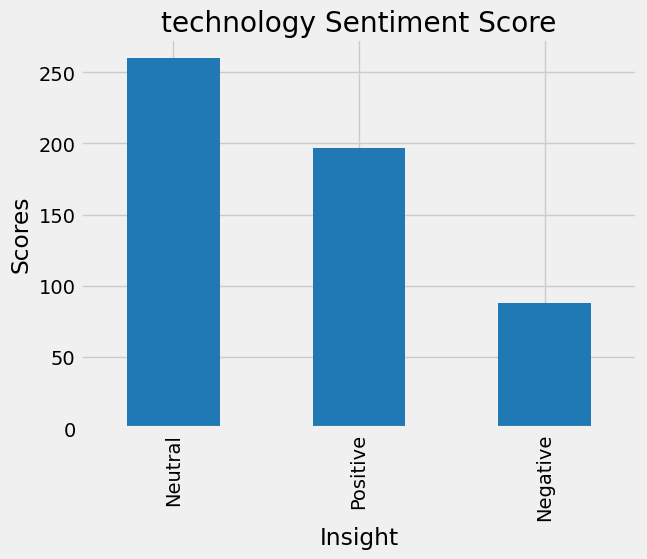

In [19]:
#Plot the values count of sentiment
plt.title("technology Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
technology_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Wordcloud

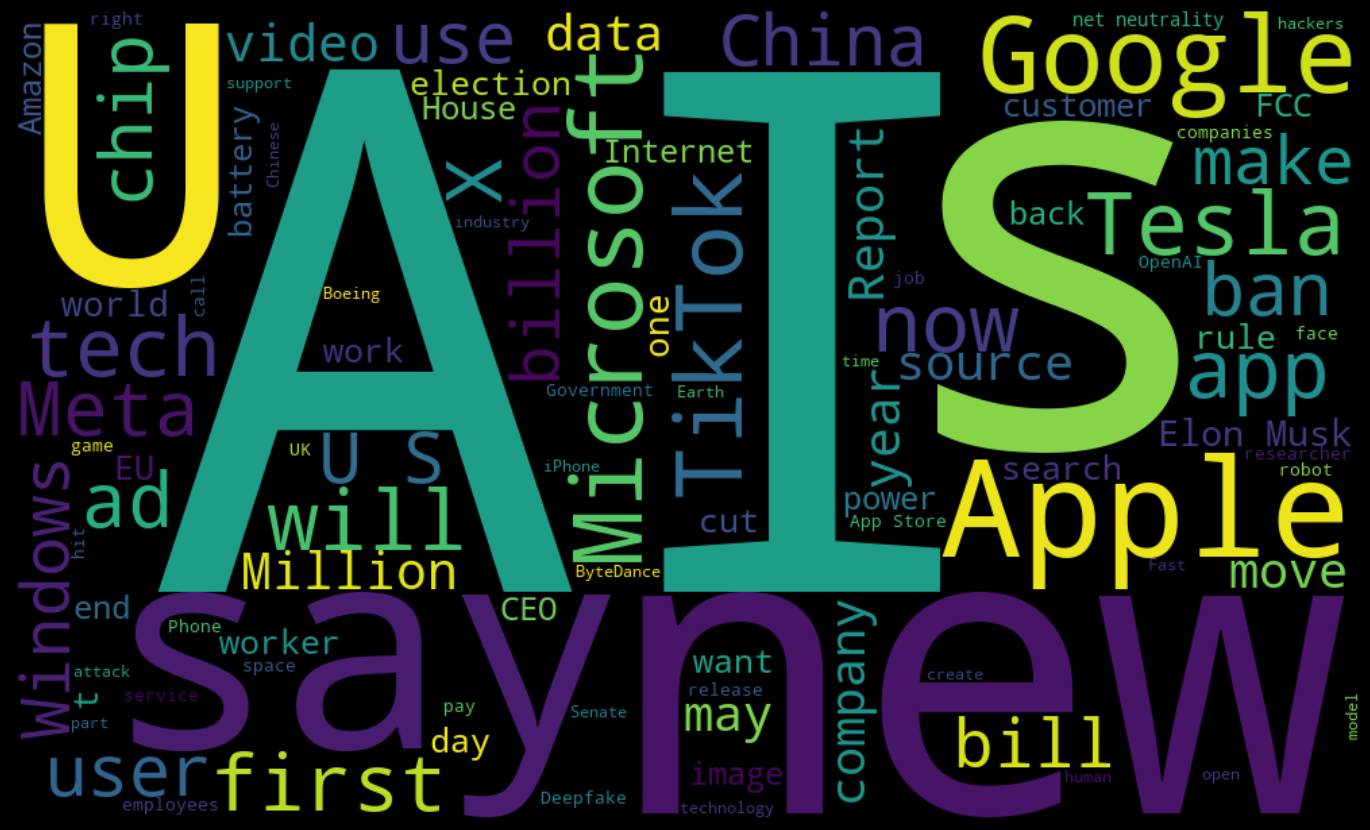

In [20]:
text = ' '.join( [twts for twts in technology_df['Titles']] ) #To join all tweet

# generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

# Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");